# (Ce fichier est un bac à sable (ou brouillon) pour tester certaines fonctions et analyses, donc à ignorer)

# Les fichiers d'analyse exploratoire sont [Data_Cleaning](./Data_cleaning.ipynb) (nettoyage des données) et [Exploratory_analysis](./Exploratory_analysis.ipynb)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.preprocessing import LabelEncoder

In [17]:
dfPokemonData = pd.read_csv('./Datasets/MP-24-25_Cleaned.csv')

In [25]:
dfPokemonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1045 non-null   int64  
 1   pokedex_number    1045 non-null   int64  
 2   name              1045 non-null   object 
 3   generation        1045 non-null   int64  
 4   status            1045 non-null   object 
 5   species           1045 non-null   object 
 6   type_number       1045 non-null   int64  
 7   type_1            1045 non-null   object 
 8   type_2            553 non-null    object 
 9   height            1045 non-null   float64
 10  weight            1045 non-null   float64
 11  abilities_number  1045 non-null   int64  
 12  ability_1         1042 non-null   object 
 13  ability_2         516 non-null    object 
 14  ability_hidden    813 non-null    object 
 15  total_points      1045 non-null   int64  
 16  hp                1045 non-null   int64  


In [45]:
CategoricalColumns = dfPokemonData.select_dtypes(include= 'object').columns
CategoricalColumns

Index(['name', 'status', 'species', 'type_1', 'type_2', 'ability_1',
       'ability_2', 'ability_hidden', 'growth_rate', 'egg_type_1',
       'egg_type_2'],
      dtype='object')

In [55]:
# Label encoding pour convertir les variables qualitatives en numériques
le = LabelEncoder()

for feat in CategoricalColumns:
    dfPokemonData[feat] = le.fit_transform(dfPokemonData[feat].astype('str'))

print (dfPokemonData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1045 non-null   int64  
 1   pokedex_number    1045 non-null   int64  
 2   name              1045 non-null   int32  
 3   generation        1045 non-null   int64  
 4   status            1045 non-null   int32  
 5   species           1045 non-null   int32  
 6   type_number       1045 non-null   int64  
 7   type_1            1045 non-null   int32  
 8   type_2            1045 non-null   int32  
 9   height            1045 non-null   float64
 10  weight            1045 non-null   float64
 11  abilities_number  1045 non-null   int64  
 12  ability_1         1045 non-null   int32  
 13  ability_2         1045 non-null   int32  
 14  ability_hidden    1045 non-null   int32  
 15  total_points      1045 non-null   int64  
 16  hp                1045 non-null   int64  


In [61]:
#dfPokemonDummies = pd.get_dummies(data=dfPokemonData.drop(columns=['Unnamed: 0'])).corr()
dfPokemonCorr = dfPokemonData.drop(columns='Unnamed: 0').corr()

<Axes: >

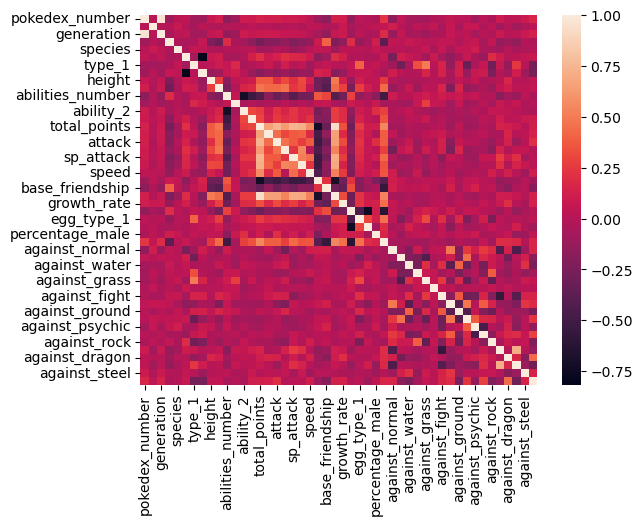

In [63]:
sns.heatmap(dfPokemonCorr)